In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('LeagueofLegends.csv')
#df_bans = pd.read_csv('bans.csv')
#df_gold = pd.read_csv('gold.csv')
#df_kills = pd.read_csv('kills.csv')
#df_matchinfo = pd.read_csv('matchinfo.csv')
#df_monsters = pd.read_csv('monsters.csv')
#df_structures = pd.read_csv('structures.csv')

In [3]:
df.shape

(7620, 57)

In [4]:
#df_bans.shape

In [5]:
#df_gold.shape

In [6]:
#df_kills.shape

In [7]:
#df_matchinfo.shape

In [8]:
#df_monsters.shape

In [9]:
#df_structures.shape

In [10]:
df.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bKills', 'bTowers',
       'bInhibs', 'bDragons', 'bBarons', 'bHeralds', 'goldred', 'rKills',
       'rTowers', 'rInhibs', 'rDragons', 'rBarons', 'rHeralds', 'blueTop',
       'blueTopChamp', 'goldblueTop', 'blueJungle', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddle', 'blueMiddleChamp', 'goldblueMiddle',
       'blueADC', 'blueADCChamp', 'goldblueADC', 'blueSupport',
       'blueSupportChamp', 'goldblueSupport', 'blueBans', 'redTop',
       'redTopChamp', 'goldredTop', 'redJungle', 'redJungleChamp',
       'goldredJungle', 'redMiddle', 'redMiddleChamp', 'goldredMiddle',
       'redADC', 'redADCChamp', 'goldredADC', 'redSupport', 'redSupportChamp',
       'goldredSupport', 'redBans', 'Address'],
      dtype='object')

In [11]:
#bResult -> Blue wins
#rResult -> Red wins
Blue_wins = df[["bResult"]].sum()
Red_wins = df[["rResult"]].sum()

print(Blue_wins)
print(Red_wins)

bResult    4146
dtype: int64
rResult    3474
dtype: int64


In [12]:
print("The blues win more often by:",Blue_wins.sum() / Red_wins.sum())

#The blues win more often by 1.1934369602763386 times

The blues win more often by: 1.1934369602763386


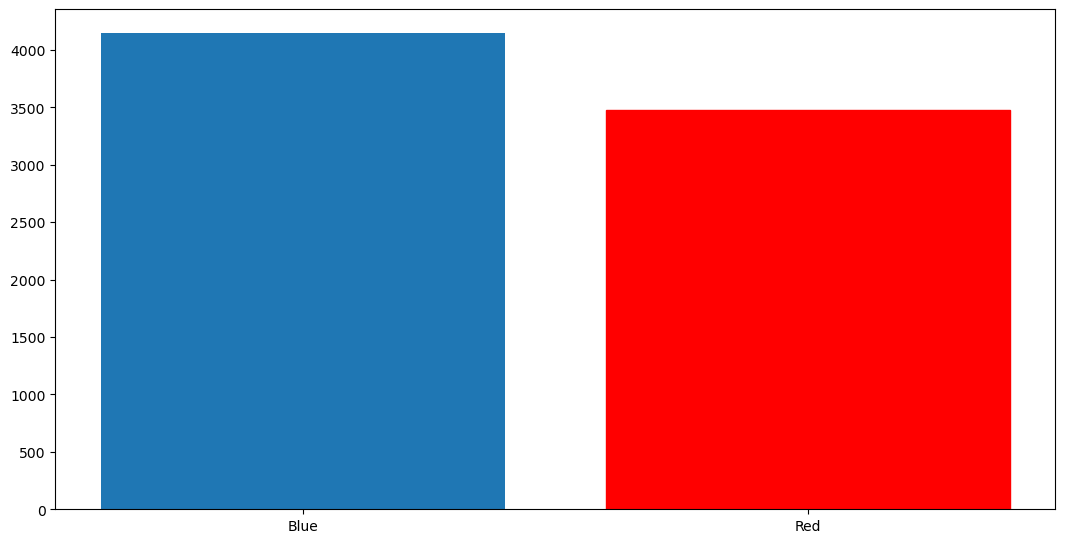

In [13]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0,0,1,1])
Teams = ['Blue', 'Red']
Values = [df.bResult.sum(), df.rResult.sum()]
bar = ax.bar(Teams, Values)
bar[1].set_color('r')
plt.show()

In [22]:
df[['blueTopChamp','bResult']].groupby(['blueTopChamp']).agg('sum').sort_values(by='bResult',ascending=False)

,bResult
blueTopChamp,
Maokai,464
Shen,344
Gnar,340
Rumble,332
Poppy,215
...,...
Katarina,0
Warwick,0
Diana,0


In [33]:
sortedbt = df['blueTopChamp'].unique()
#sorting champions top lane champions to check if all names are correct 
print(sorted(sortedbt))

['Akali', 'Alistar', 'Azir', 'Bard', 'Blitzcrank', 'Camille', 'Cassiopeia', 'Chogath', 'Darius', 'Diana', 'DrMundo', 'Ekko', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Illaoi', 'Irelia', 'JarvanIV', 'Jax', 'Jayce', 'Karma', 'Kassadin', 'Katarina', 'Kayle', 'Kennen', 'Khazix', 'Kled', 'LeeSin', 'Lissandra', 'Lucian', 'Lulu', 'Malphite', 'Malzahar', 'Maokai', 'Mordekaiser', 'Morgana', 'Nasus', 'Nautilus', 'Nidalee', 'Nocturne', 'Nunu', 'Olaf', 'Ornn', 'Pantheon', 'Poppy', 'Quinn', 'Rammus', 'RekSai', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Sejuani', 'Shen', 'Shyvana', 'Singed', 'Sion', 'Swain', 'TahmKench', 'Taliyah', 'Talon', 'Teemo', 'Trundle', 'Urgot', 'Varus', 'Vladimir', 'Warwick', 'XinZhao', 'Yasuo', 'Yorick', 'Zac', 'Zed']


In [71]:
#how many champions have no wins
blueTopChamp_sorted = df[['blueTopChamp','bResult']].groupby(['blueTopChamp']).agg('sum').sort_values(by='bResult',ascending=False)
blueTopChamp_sorted

,bResult
blueTopChamp,
Maokai,464
Shen,344
Gnar,340
Rumble,332
Poppy,215
...,...
Katarina,0
Warwick,0
Diana,0


In [97]:
#checking how many times champions were picked 
picks = (
    df[['blueTopChamp','bResult']]
    .groupby(['blueTopChamp'])
    .count()
    .sort_values(by='bResult', ascending=False)
    .reset_index()
)
picks

,blueTopChamp,bResult
0,Maokai,827
1,Shen,657
2,Gnar,625
3,Rumble,571
4,Nautilus,400
...,...,...
73,XinZhao,1
74,Diana,1
75,Blitzcrank,1
76,Bard,1


In [103]:
#getting list of champions that were picked at least 70 times 
picks70 = picks[picks['bResult']> 69]
picks70

,blueTopChamp,bResult
0,Maokai,827
1,Shen,657
2,Gnar,625
3,Rumble,571
4,Nautilus,400
5,Poppy,386
6,Trundle,329
7,Renekton,307
8,Fiora,247
9,JarvanIV,237


In [111]:
win_ratio = blueTopChamp_sorted / picks70
win_ratio.sort_values(by='bResult', ascending=False).head(50)

,bResult,blueTopChamp
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [109]:
blueTopChamp_sorted[blueTopChamp_sorted==0].count()
#there are 11 champs that haven't won any match

bResult    11
dtype: int64

In [75]:
blueTopChamp_sorted

,bResult
blueTopChamp,
Maokai,464
Shen,344
Gnar,340
Rumble,332
Poppy,215
...,...
Katarina,0
Warwick,0
Diana,0


In [76]:
blueTopChamp_sorted.tail(15)

,bResult
blueTopChamp,
Nunu,1
Khazix,1
Karma,1
Zed,1
RekSai,0
Nasus,0
LeeSin,0
Teemo,0
Urgot,0


In [68]:
redTopChamp_sorted = df[['redTopChamp','rResult']].groupby(['redTopChamp']).agg('sum').sort_values(by='rResult',ascending=False)
redTopChamp_sorted

,rResult
redTopChamp,
Maokai,411
Gnar,305
Shen,282
Rumble,222
Nautilus,186
...,...
Heimerdinger,0
Talon,0
Kayn,0


In [26]:
df['redTopChamp'].unique()

array(['Gnar', 'Irelia', 'Sion', 'Renekton', 'Rumble', 'Kassadin', 'Lulu',
       'Maokai', 'Malphite', 'Lissandra', 'Swain', 'DrMundo', 'Hecarim',
       'Morgana', 'Kennen', 'JarvanIV', 'Gragas', 'Yasuo', 'Ryze', 'Fizz',
       'Ekko', 'Vladimir', 'Shen', 'Nautilus', 'Olaf', 'Shyvana',
       'Gangplank', 'Jax', 'Chogath', 'Fiora', 'Trundle', 'Graves',
       'Poppy', 'Quinn', 'Pantheon', 'Kayle', 'TahmKench', 'Riven',
       'Illaoi', 'Teemo', 'Singed', 'Jayce', 'Camille', 'Kled', 'Galio',
       'Lucian', 'Urgot', 'Azir', 'Yorick', 'LeeSin', 'Diana', 'Zac',
       'Rammus', 'Taliyah', 'Talon', 'Warwick', 'Aatrox', 'Mordekaiser',
       'Akali', 'Shaco', 'Rengar', 'RekSai', 'Karma', 'Malzahar',
       'Sejuani', 'Cassiopeia', 'Zed', 'Darius', 'Heimerdinger', 'Ashe',
       'Khazix', 'Nasus', 'MasterYi', 'Tryndamere', 'MonkeyKing',
       'XinZhao', 'Kayn', 'Nidalee', 'Ornn', 'Viktor', 'Annie'],
      dtype=object)

In [34]:
sortedbt = df['redTopChamp'].unique()
#sorting champions top lane champions to check if all names are correct 
print(sorted(sortedbt))
#here we can find 'MonkeyKing' - there is no such champion so it needs to be changed to Wukong

['Aatrox', 'Akali', 'Annie', 'Ashe', 'Azir', 'Camille', 'Cassiopeia', 'Chogath', 'Darius', 'Diana', 'DrMundo', 'Ekko', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'JarvanIV', 'Jax', 'Jayce', 'Karma', 'Kassadin', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kled', 'LeeSin', 'Lissandra', 'Lucian', 'Lulu', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nasus', 'Nautilus', 'Nidalee', 'Olaf', 'Ornn', 'Pantheon', 'Poppy', 'Quinn', 'Rammus', 'RekSai', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Sejuani', 'Shaco', 'Shen', 'Shyvana', 'Singed', 'Sion', 'Swain', 'TahmKench', 'Taliyah', 'Talon', 'Teemo', 'Trundle', 'Tryndamere', 'Urgot', 'Viktor', 'Vladimir', 'Warwick', 'XinZhao', 'Yasuo', 'Yorick', 'Zac', 'Zed']


In [36]:
df = df.replace('MonkeyKing', 'Wukong')

In [38]:
print(sorted(sortedbt))

['Aatrox', 'Akali', 'Annie', 'Ashe', 'Azir', 'Camille', 'Cassiopeia', 'Chogath', 'Darius', 'Diana', 'DrMundo', 'Ekko', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Gnar', 'Gragas', 'Graves', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'JarvanIV', 'Jax', 'Jayce', 'Karma', 'Kassadin', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kled', 'LeeSin', 'Lissandra', 'Lucian', 'Lulu', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'Mordekaiser', 'Morgana', 'Nasus', 'Nautilus', 'Nidalee', 'Olaf', 'Ornn', 'Pantheon', 'Poppy', 'Quinn', 'Rammus', 'RekSai', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Sejuani', 'Shaco', 'Shen', 'Shyvana', 'Singed', 'Sion', 'Swain', 'TahmKench', 'Taliyah', 'Talon', 'Teemo', 'Trundle', 'Tryndamere', 'Urgot', 'Viktor', 'Vladimir', 'Warwick', 'Wukong', 'XinZhao', 'Yasuo', 'Yorick', 'Zac', 'Zed']


In [69]:
redTopChamp_sorted[redTopChamp_sorted==0].count()
#From red side, there are 12 champions that haven't won any match

rResult    12
dtype: int64

In [66]:
redTopChamp_sorted.tail(15)

,rResult
redTopChamp,
Malzahar,1
Shaco,1
Mordekaiser,1
Warwick,0
Annie,0
Ashe,0
Wukong,0
Rengar,0
Teemo,0
